In [1]:
%matplotlib inline
import precomputed_domain
import numpy as np

/home/joel/tensorflow/local/lib/python2.7/site-packages/numba/dataflow.py:346: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


In [2]:
domain = precomputed_domain.precomputed_maze_domain('medium')

cached...


In [3]:
evo = domain.data["evolvability"]
beh = domain.data["x"],domain.data["y"]

fitness = np.sqrt(  ((beh[0].astype(np.int32))-domain.goal[0])**2 + ((beh[1].astype(np.int32))-domain.goal[1])**2 )
solution_distance = domain.distance
solution = domain.data["solution"]

print domain.goal
print solution.sum()


print beh[0][0]-domain.goal[1]
print beh[1][0]-domain.goal[0]
print fitness[0]
print fitness.mean()

print len(np.unique(domain.data["behaviorhash"]))

(270, 100)
320
-26
-191
197.121789765
229.859090295
291


# Evolvability

## Evolvability histogram

(array([  1.97413000e+05,   2.55613900e+06,   7.93278500e+06,
          1.18293040e+07,   1.03439350e+07,   7.55728900e+06,
          2.04512800e+06,   5.20293000e+05,   6.23380000e+04,
          2.09700000e+03]),
 array([  1. ,   4.2,   7.4,  10.6,  13.8,  17. ,  20.2,  23.4,  26.6,
         29.8,  33. ]),
 <a list of 10 Patch objects>)

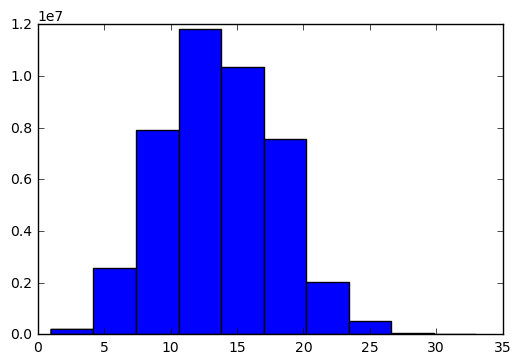

In [4]:
from pylab import *
hist(evo)

## K-step Evolvability

cached...
cached...
cached...
cached...


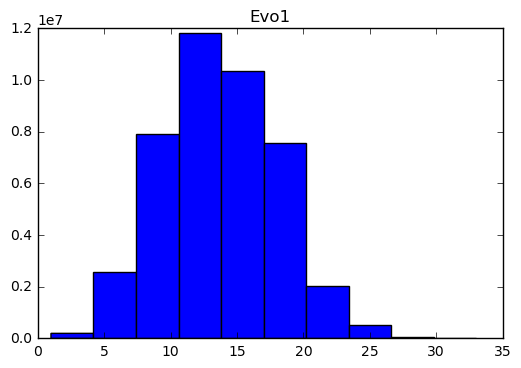

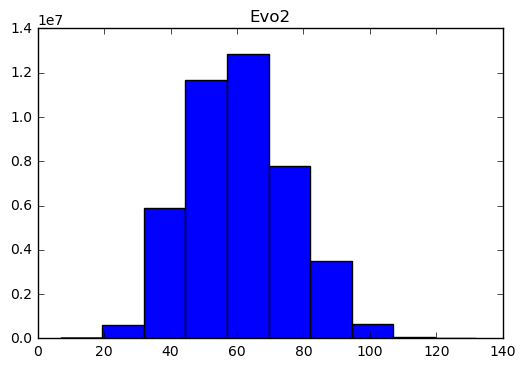

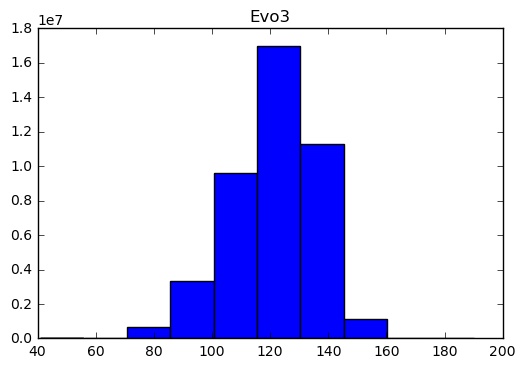

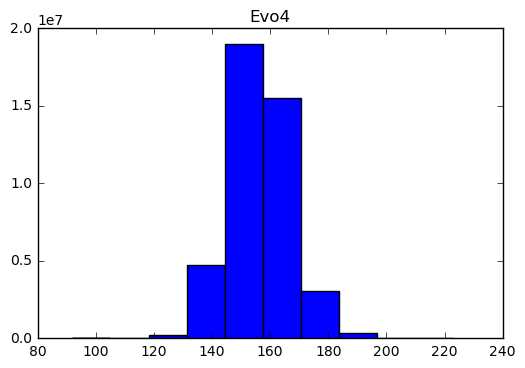

In [14]:

for k in range(1,5):
 domain.kstep_evolvability_calculate(k)
 title("Evo%d" % k) 
 hist(domain.evo[k])
 figure()

## Everywhere-evolvability

cached...


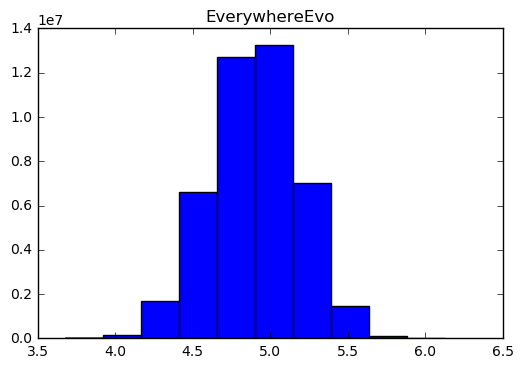

In [5]:
from pylab import *
domain.everywhere_evolvability_calculate()
title("EverywhereEvo" ) 
hist(domain.evo_everywhere)
figure()

In [13]:
worst = np.argmax(domain.evo_everywhere)
print worst,domain.data["evolvability"][worst]

best = np.argmin(domain.evo_everywhere)
print best,domain.data["evolvability"][best]

37227145 6
2203349 26


# Fitness 

114
320


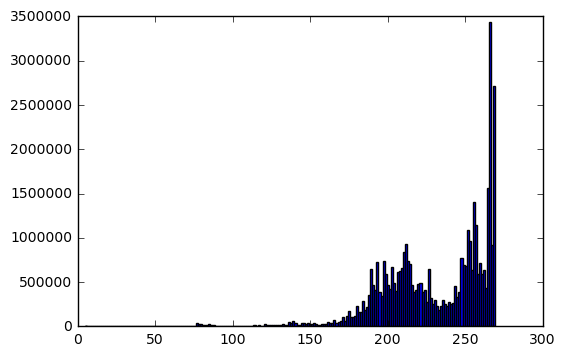

In [138]:
hist(fitness,bins=200)

print (fitness<20.0).sum()
print solution.sum()

# Solution Distance

(array([  9.47500000e+03,   1.17086000e+05,   8.63693000e+05,
          3.87224200e+06,   1.02340510e+07,   1.47493890e+07,
          1.01944850e+07,   2.77674600e+06,   2.25870000e+05,
          3.68400000e+03]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

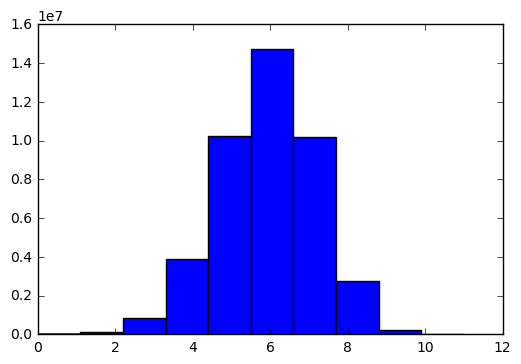

In [139]:
hist(domain.distance)

# Binning

In [16]:
import matplotlib.pyplot as plt
import random

def aggregate1d(x,y,gridsize=50):
    cnt=np.zeros(gridsize)
    total = np.zeros(gridsize)
    
    xmax = x.max()+0.00001
    xmin = x.min()-0.00001
    
    xcoord =  ( ((x-xmin))/(xmax-xmin)*(gridsize) ).astype(np.uint32)
    np.add.at(cnt,xcoord,1)
    np.add.at(total,xcoord,y)
    mean = total/cnt
    
    xc=np.linspace(xmin,xmax,gridsize)
    
    return xc,mean

def sample2d(x,y,samples=10000):
 sampled_idxes = np.random.randint(0,len(x),samples)
 xprime = x[sampled_idxes]
 yprime = y[sampled_idxes]
 return xprime,yprime

def heatmap(x,y,gridsize=[50,50],maxsize=100000):
 xmin = x.min()
 xmax = x.max()
 ymin = y.min()
 ymax = y.max()

 heatmap, xedges, yedges = np.histogram2d(x, y, bins=gridsize)
 extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

 plt.clf()
 plt.imshow(heatmap.T, extent=extent, origin='lower')
 plt.show()

# # Relationship between fitness and evolvability


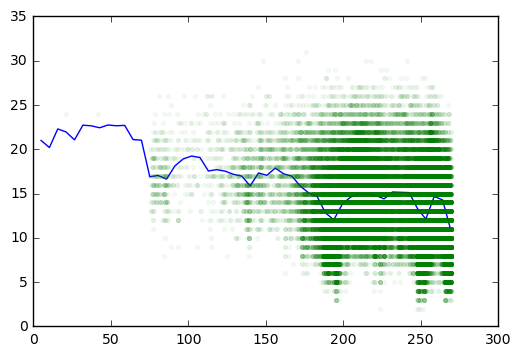

In [140]:
res= aggregate1d(fitness,evo)

plot(res[0],res[1])

x,y = sample2d(fitness,evo,50000)
plot(x,y,".",alpha=0.05)

## Relationship  between fitness and distance to solution

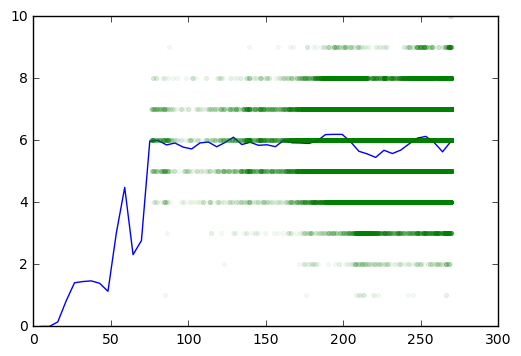

In [141]:
res= aggregate1d(fitness,domain.distance)

plot(res[0],res[1])

x,y = sample2d(fitness,domain.distance,50000)
plot(x,y,".",alpha=0.05)

## Relationship between evolvability and distance to solution

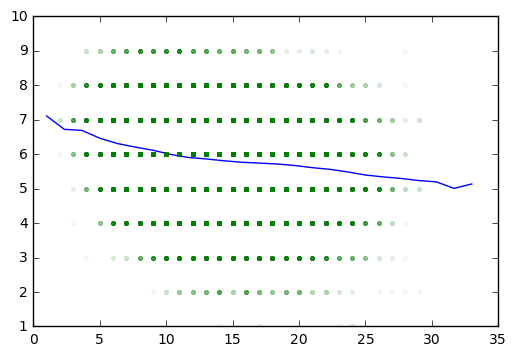

In [142]:
res= aggregate1d(evo,domain.distance,gridsize=25)

plot(res[0],res[1])

x,y = sample2d(evo,domain.distance,50000)
plot(x,y,".",alpha=0.05)

## Relationship between k-step evolvability and distance to solution

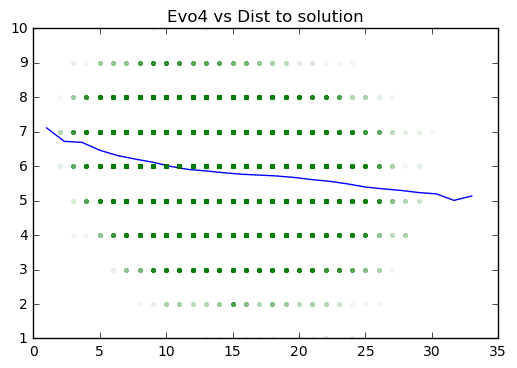

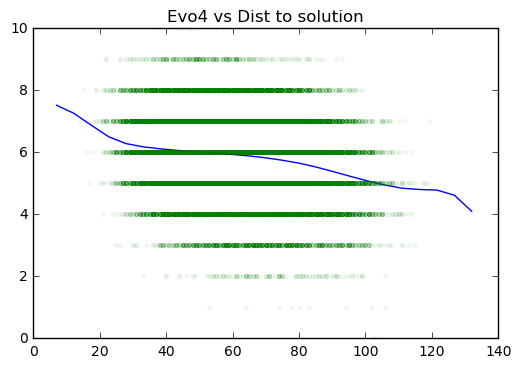

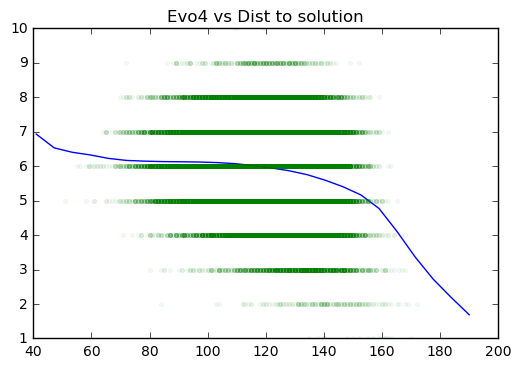

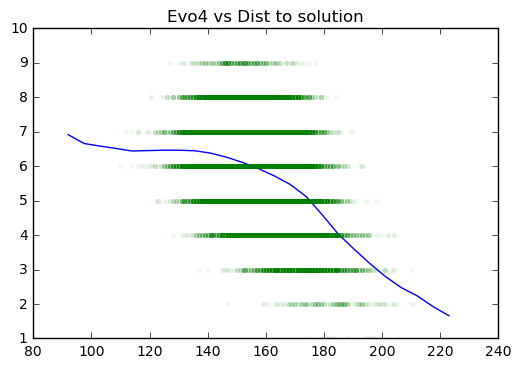

In [18]:
for k in range(1,5):
 title("Evo%d vs Dist to solution"%k)
 res= aggregate1d(domain.evo[k],domain.distance,gridsize=25)

 plot(res[0],res[1])

 x,y = sample2d(domain.evo[k],domain.distance,50000)
 plot(x,y,".",alpha=0.05)
 figure()

## Everywhere-evolvability vs distance-to-solution

['__doc__', '__init__', '__module__', 'behavior', 'behavior_size', 'clone', 'data', 'distance', 'everywhere_evolvability_calculate', 'evo', 'evo_everywhere', 'evolvability', 'fitness', 'fname', 'from_idx', 'gather_neighbors', 'generate_random', 'get_data', 'get_neighbors', 'goal', 'kstep_evolvability_calculate', 'load_all_niche_distances', 'map_behavior', 'map_evolvability', 'map_fitness', 'map_gt_fitness', 'map_novelty', 'map_solution', 'maze', 'mmap', 'mutate', 'niche_distance', 'niche_distance_calculate', 'random_idx', 'read_in', 'size', 'solution_distance_calculate', 'storage_directory', 'to_idx']


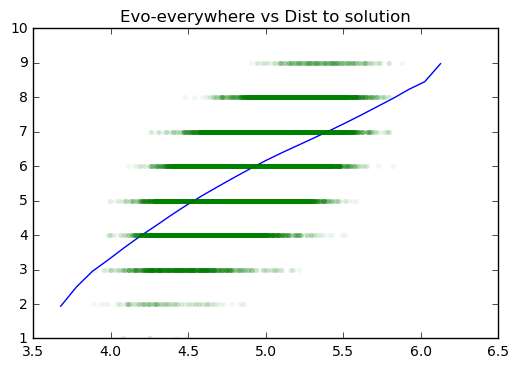

In [25]:
title("Evo-everywhere vs Dist to solution")
res= aggregate1d(domain.evo_everywhere,domain.distance,gridsize=25)

plot(res[0],res[1])

x,y = sample2d(domain.evo_everywhere,domain.distance,50000)
plot(x,y,".",alpha=0.05)


## How well does ideal evolvability measure correlate with 1-step evo?

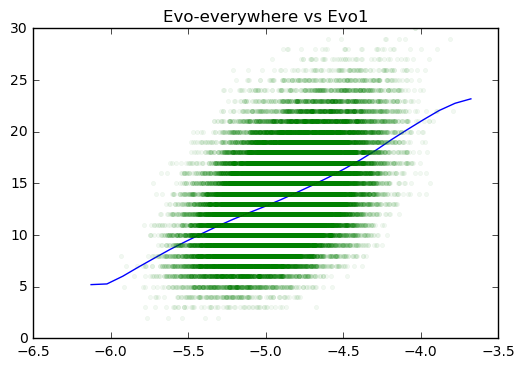

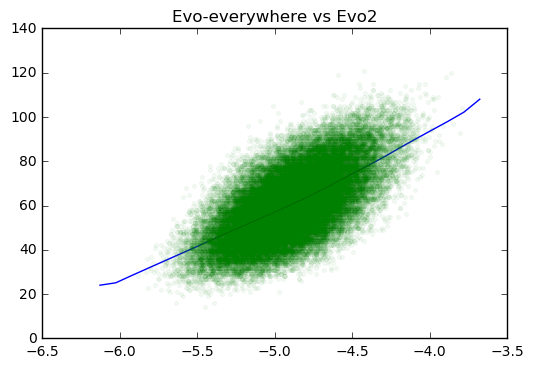

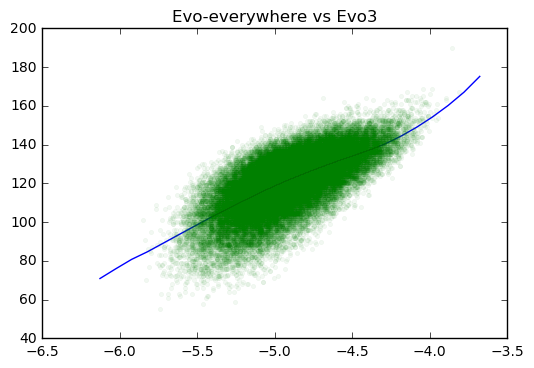

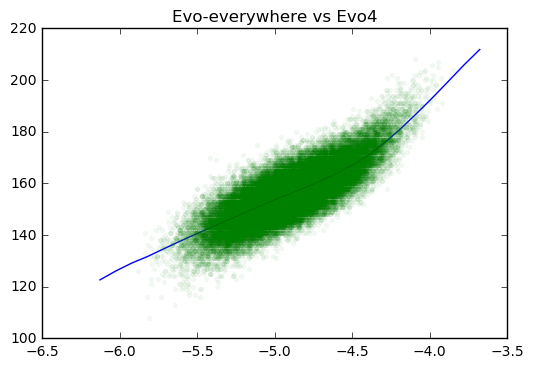

In [27]:
for k in range(1,5):
    title("Evo-everywhere vs Evo%d" % k)
    res= aggregate1d(-domain.evo_everywhere,domain.evo[k],gridsize=25)

    plot(res[0],res[1])

    x,y = sample2d(-domain.evo_everywhere,domain.evo[k],50000)
    plot(x,y,".",alpha=0.05)
    figure()

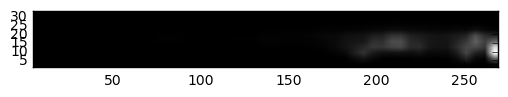

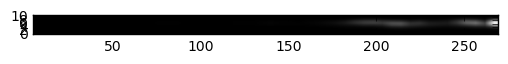

In [148]:
title("Fitness vs Evolvability")
heatmap(fitness,evo,gridsize=[50,10])
figure()
title("Fitness vs True Distance to Goal")
heatmap(fitness,domain.distance,gridsize=[50,10])

# Behavior distribution

In [143]:
def construct_behavior_grid(xdata,ydata,default_val=None,quantity=None,grid_sz=30):
    cnt = np.zeros((grid_sz,grid_sz))
    #evo_dist = np.zeros((grid_sz,grid_sz))-1
    
    xmax = xdata.max()+0.00001
    ymax = ydata.max()+0.00001

    xcoord = (beh[0]/xmax)*(grid_sz)
    ycoord = (beh[1]/ymax)*(grid_sz)

    xcoord = xcoord.astype(int)
    ycoord = ycoord.astype(int)
    
    print "adding..."
    np.add.at(cnt,(xcoord,ycoord),1)
    cnt/=xcoord.shape[0]
    
    if quantity!=None:
     total = np.zeros((grid_sz,grid_sz))
     np.add.at(total,(xcoord,ycoord),quantity)
     mean = total/cnt
     return mean

    if default_val != None:
        print "not none..."
        cnt[cnt==0] = default_val
     
    return cnt


## Behavior Density

adding...
not none...


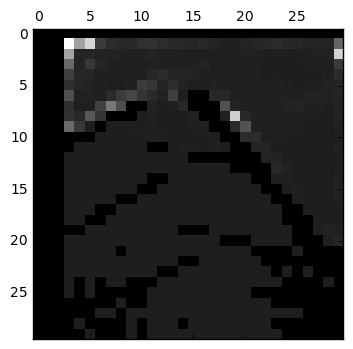

In [144]:
gray()
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],default_val=-0.01))


## Fitness Distribution

adding...


/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


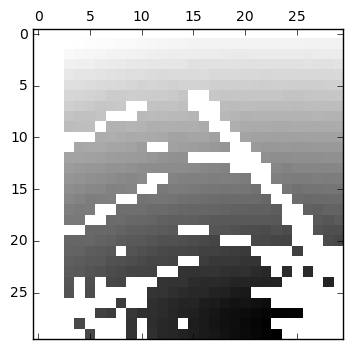

In [145]:
gray()
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=fitness))

## Evolvability Distribution

adding...


/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


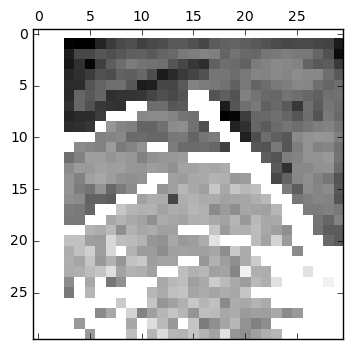

In [146]:
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=evo))

## Distance to solution distribution

adding...


/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/joel/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


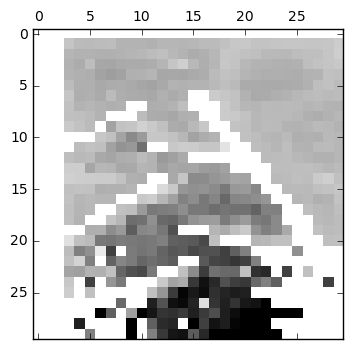

In [147]:
matshow( construct_behavior_grid(domain.data["x"],domain.data["y"],quantity=domain.distance))

In [14]:
xmax = domain.data["x"].max()+0.00001
ymax = domain.data["y"].max()+0.00001
xcoord = (beh[0]/xmax)*(grid_sz)
ycoord = (beh[1]/ymax)*(grid_sz)
xcoord = xcoord.astype(int)
ycoord = ycoord.astype(int)

print "adding..."
np.add.at(evo_cnt,(xcoord,ycoord),1)
np.add.at(evo_dist,(xcoord,ycoord),fitness)


adding...


In [15]:
np.unravel_index(np.argmax(evo_cnt),evo_cnt.shape)

evo_mean = evo_dist/evo_cnt

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


28884187039.0


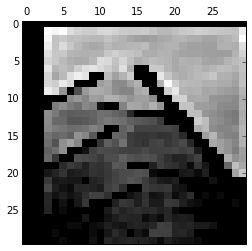

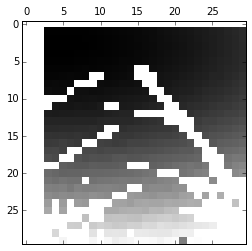

In [16]:
from pylab import *
gray()
matshow(np.log(evo_cnt+1))
figure()
matshow(evo_mean)
print evo_dist.max()

In [17]:
(domain.distance==0).sum()

43046401

# Behavior distribution